In [65]:
import numpy as np
from numpy.testing import assert_almost_equal

In [66]:
# 顯示小數點下兩位，保持畫面簡潔
np.set_printoptions(precision=2)

In [67]:
# reproductivity
rng = np.random.RandomState(1)

In [68]:
# 初始化實驗數據並減去平均（文後會說明為何要減去平均）
W = rng.rand(2, 2)
W

array([[4.17e-01, 7.20e-01],
       [1.14e-04, 3.02e-01]])

In [69]:
X_normal = rng.normal(scale=5, size=(2, 20))
X_normal

array([[ -2.64,  -5.36,   4.33, -11.51,   8.72,  -3.81,   1.6 ,  -1.25,
          7.31, -10.3 ,  -1.61,  -1.92,   5.67,  -5.5 ,  -0.86,  -4.39,
          0.21,   2.91,  -5.5 ,   5.72],
       [  4.51,   2.51,   4.5 ,  -3.42,  -0.61,  -4.68,  -1.34,   2.65,
         -3.46,  -1.98,  -3.44,  -4.23,  -3.36,  -0.06,  -5.59,   1.17,
          8.3 ,   3.71,  -0.96,  -4.44]])

In [70]:
X_orig = W @ X_normal  # @ 就是你學過的矩陣相乘運算
X_orig

array([[ 2.15, -0.43,  5.05, -7.26,  3.2 , -4.96, -0.3 ,  1.39,  0.56,
        -5.72, -3.15, -3.84, -0.05, -2.34, -4.38, -0.99,  6.07,  3.89,
        -2.99, -0.81],
       [ 1.36,  0.76,  1.36, -1.03, -0.18, -1.42, -0.4 ,  0.8 , -1.04,
        -0.6 , -1.04, -1.28, -1.01, -0.02, -1.69,  0.35,  2.51,  1.12,
        -0.29, -1.34]])

In [71]:
X_mean = X_orig.mean(axis=1)[:, np.newaxis]
X_mean

array([[-0.75],
       [-0.15]])

In [72]:
X = X_orig - X_mean
X

array([[ 2.89,  0.32,  5.8 , -6.52,  3.94, -4.21,  0.45,  2.14,  1.3 ,
        -4.98, -2.4 , -3.1 ,  0.69, -1.59, -3.64, -0.24,  6.81,  4.63,
        -2.24, -0.06],
       [ 1.52,  0.91,  1.52, -0.88, -0.03, -1.26, -0.25,  0.96, -0.89,
        -0.45, -0.88, -1.12, -0.86,  0.13, -1.53,  0.51,  2.66,  1.28,
        -0.14, -1.19]])

In [73]:
mean = X.mean(axis=1)
mean

array([-1.11e-17, -2.22e-17])

In [77]:
# 測試 numerical 相等，確保樣本的平均已經為 0
assert_almost_equal(0, mean)

In [75]:
print('X.shape:', X.shape, '\n')
print(X)

X.shape: (2, 20) 

[[ 2.89  0.32  5.8  -6.52  3.94 -4.21  0.45  2.14  1.3  -4.98 -2.4  -3.1
   0.69 -1.59 -3.64 -0.24  6.81  4.63 -2.24 -0.06]
 [ 1.52  0.91  1.52 -0.88 -0.03 -1.26 -0.25  0.96 -0.89 -0.45 -0.88 -1.12
  -0.86  0.13 -1.53  0.51  2.66  1.28 -0.14 -1.19]]


In [78]:
"""
每個樣本為一個 column vector，索引從 0 開始
第一個 「 : 」 代表取得所有對應的 rows
"""
X[:, 0]

array([2.89, 1.52])

In [79]:
"""
跟上例一樣取出第一個樣本。
因第一維度為 n_samples ，只需要一維索引即可
"""
# sanity check
assert_almost_equal(X[:, 0], X.T[0])
X.T[0]

array([2.89, 1.52])

In [80]:
X[:, :6]

array([[ 2.89,  0.32,  5.8 , -6.52,  3.94, -4.21],
       [ 1.52,  0.91,  1.52, -0.88, -0.03, -1.26]])

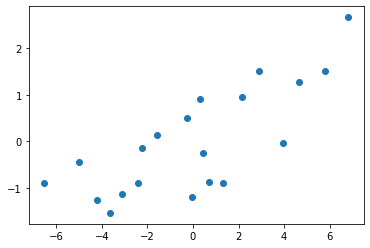

In [82]:
import matplotlib.pyplot as plt
plt.scatter(X[0], X[1])

In [83]:
X[:, :4]

array([[ 2.89,  0.32,  5.8 , -6.52],
       [ 1.52,  0.91,  1.52, -0.88]])

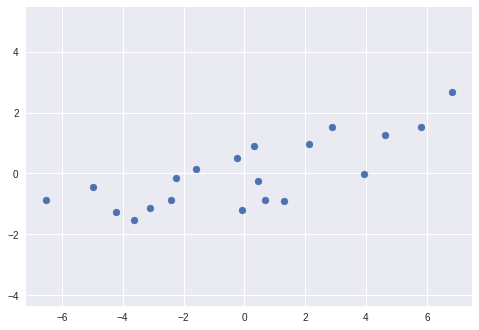

In [90]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# 第一個參數為所有的 xs, 第二個參數為所有的 ys
plt.scatter(X[0, :], X[1, :])
plt.axis('equal');

In [96]:
# 該直線的單位向量（顯示到小數後第兩位）
v = np.array([0.9691344, 0.246533])
print("v       :", v)  # shape: (2,)
assert_almost_equal(1, np.linalg.norm(v))

v       : [0.97 0.25]


In [92]:
# 使用 v 建立投影矩陣 Ｐ1
# 因為 P 是將 X 投影到 1 維，因此加個 1 在後面
P1 = v[np.newaxis, :]  # shape: (1, 2)
print("P1      :", P1)

P1      : [[0.97 0.25]]


In [93]:
# 利用 P1 將數據 X 投影到 v 所在子空間 
L = P1 @ X

In [94]:
# 前 4 個樣本的新特徵 L 跟動畫內結果相同
print("L[:, :4]:", L[:, :4])

L[:, :4]: [[ 3.18  0.53  5.99 -6.53]]


In [97]:
# PCA 是一種拆解並重新表述數據的技巧
from sklearn.decomposition import PCA

# 最大化 reproductivity
random_state = 9527

In [98]:
# 使用 sklearn 實作的 PCA 將數據 X 線性地降到 1 維
# 這邊值得注意的是 sklearn API 預期的輸入維度為
# (n_samples, n_features), 輸出自然也是。
pca_1d = PCA(1, random_state=random_state)
L_sk = pca_1d.fit_transform(X.T).T 
print('L_sk.shape:', L_sk.shape)
print('L_sk:', L_sk[:, :4])

L_sk.shape: (1, 20)
L_sk: [[ 3.18  0.53  5.99 -6.53]]


In [99]:
# sklearn API 得到的結果跟我們手動計算結果相同
assert_almost_equal(L_sk, L)

In [104]:
# 橫看成嶺側成峰
data = X.T
L_transpose = pca_1d.transform(data)
assert_almost_equal(L.T, L_transpose)
# 通過測驗，沒有 assert error

In [107]:
L

array([[ 3.18,  0.53,  5.99, -6.53,  3.81, -4.39,  0.37,  2.31,  1.04,
        -4.93, -2.54, -3.28,  0.46, -1.51, -3.9 , -0.11,  7.26,  4.81,
        -2.2 , -0.35]])

In [106]:
"""
scikit-learn 裡頭的 pca 實作， transform() 就對應到上式的 T
而 inverse_transform() 則對應到 T-1。
"""
# 從新的一維特徵 L 還原回原來的 2 維數據
X_proj = pca_1d.inverse_transform(L.T).T  # 注意維度

# 依照樣本的原始向量以及投影向量算距離後加總
# 你可以一個個樣本分開計算距離並加總與此數值比較
reconstruction_error =  np.linalg.norm(X - X_proj, axis=0).sum()
reconstruction_error

12.08412078803945

In [109]:
"""
手動得到 scikit-learn API 的計算結果
"""
# 因為前面的 v 向量的 precision 不夠會導致誤差太大，
# 這邊重新建構 P1
P1 = pca_1d.components_
P1

array([[0.97, 0.25]])

In [110]:
assert_almost_equal(P1.T @ L, X_proj)

In [108]:
X_proj[:, :4]

array([[ 3.08,  0.52,  5.81, -6.33],
       [ 0.78,  0.13,  1.48, -1.61]])

In [111]:
# 別忘記 X 維度是 (n_features, n_samples)
print("X.shape:", X.shape, "\n")
print(X, "\n")

X.shape: (2, 20) 

[[ 2.89  0.32  5.8  -6.52  3.94 -4.21  0.45  2.14  1.3  -4.98 -2.4  -3.1
   0.69 -1.59 -3.64 -0.24  6.81  4.63 -2.24 -0.06]
 [ 1.52  0.91  1.52 -0.88 -0.03 -1.26 -0.25  0.96 -0.89 -0.45 -0.88 -1.12
  -0.86  0.13 -1.53  0.51  2.66  1.28 -0.14 -1.19]] 



In [112]:
# 分別計算兩特徵的樣本平均
f1_bar = X[0].mean()
f2_bar = X[1].mean()

In [113]:
# 因為我們當初已經減去各特徵平均， 兩者事實上已經為 0 
# 也就是說 f1_bar 與 f2_bar 分別跟 y, x 軸重疊
print("f1_bar:", f1_bar)
print("f2_bar:", f2_bar)
assert_almost_equal(0, f1_bar)
assert_almost_equal(0, f2_bar)

f1_bar: -1.1102230246251566e-17
f2_bar: -2.2204460492503132e-17


In [114]:
# 樣本共變異估計平均每個樣本裡特徵 1 跟特徵 2 的共同變化程度
# 為了幫助你理解，我用世界上最沒效率，但跟公式最相近的方式計算
cov = 0
for x in X.T:  # 這時就能看出 (n_samples, ) 維度在前的好處
    f1, f2 = x
    cov += (f1 - f1_bar) * (f2 - f2_bar)

n = X.shape[1]
cov /= n - 1
print("\nCov(f1, f2): {:.2f}".format(cov))


Cov(f1, f2): 3.27
